## 1.. Data Collection !

In [275]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [276]:
import glob

In [277]:
glob.glob(r'C:\Users\Sai Sailesh\Desktop\individual_stocks_5yr/*csv')

['C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ADSK_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\ADS_data.csv',
 'C:\\Users\\Sai Sailesh\\Desktop\\individual_s

In [278]:
len(glob.glob(r'C:\Users\Sai Sailesh\Desktop\individual_stocks_5yr/*csv'))

505

In [279]:
company_list=[
    r'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\MSFT_data.csv'
]    

In [280]:
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

In [281]:
all_data=pd.DataFrame()

for file in company_list:
    current_df=pd.read_csv(file)
    all_data=pd.concat([all_data,current_df],ignore_index=True)

In [282]:
all_data

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT


In [283]:
all_data.shape

(4752, 7)

In [284]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [285]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

## 2.. Analysing change in price of the stock overtime !

In [286]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [287]:
all_data.duplicated().any()

False

In [288]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [289]:
all_data['date']=pd.to_datetime(all_data['date'])

In [290]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [291]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [292]:
tech_list=all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

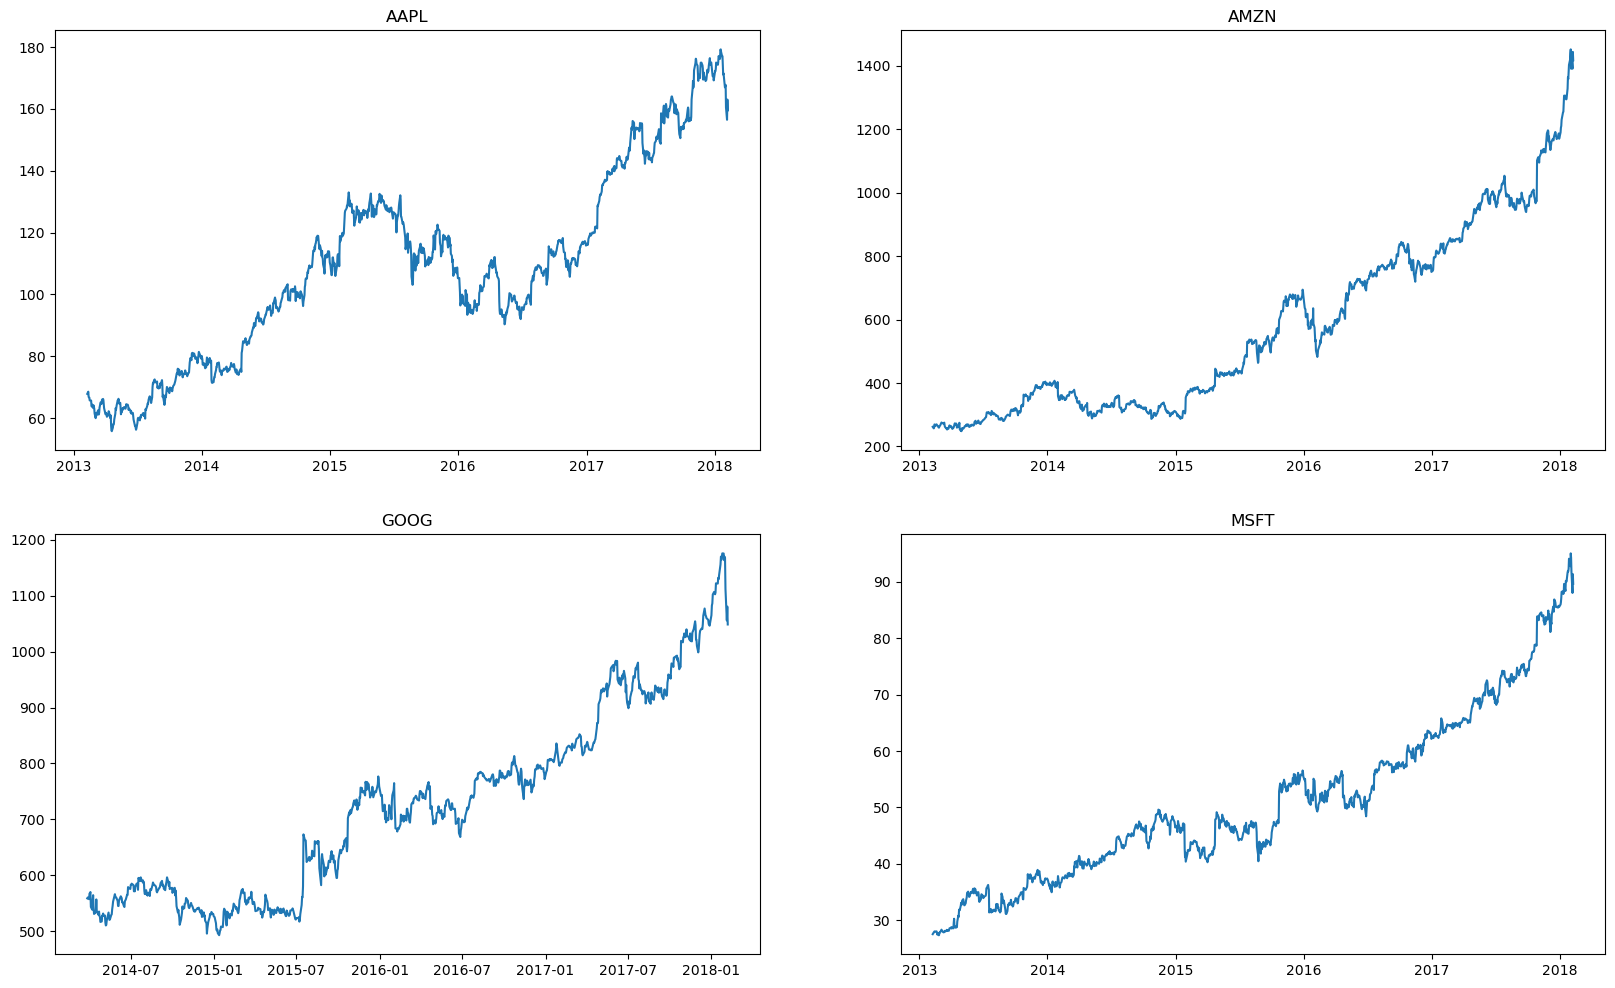

In [293]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot('date','close',data=df)
    plt.title(company)

## 3.. moving average of the various stocks !

In [294]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [295]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [296]:
new_data=all_data.copy()

In [297]:
ma_day=[10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)]=new_data['close'].rolling(ma).mean()

In [298]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,91.0535,87.4328


In [299]:
new_data.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


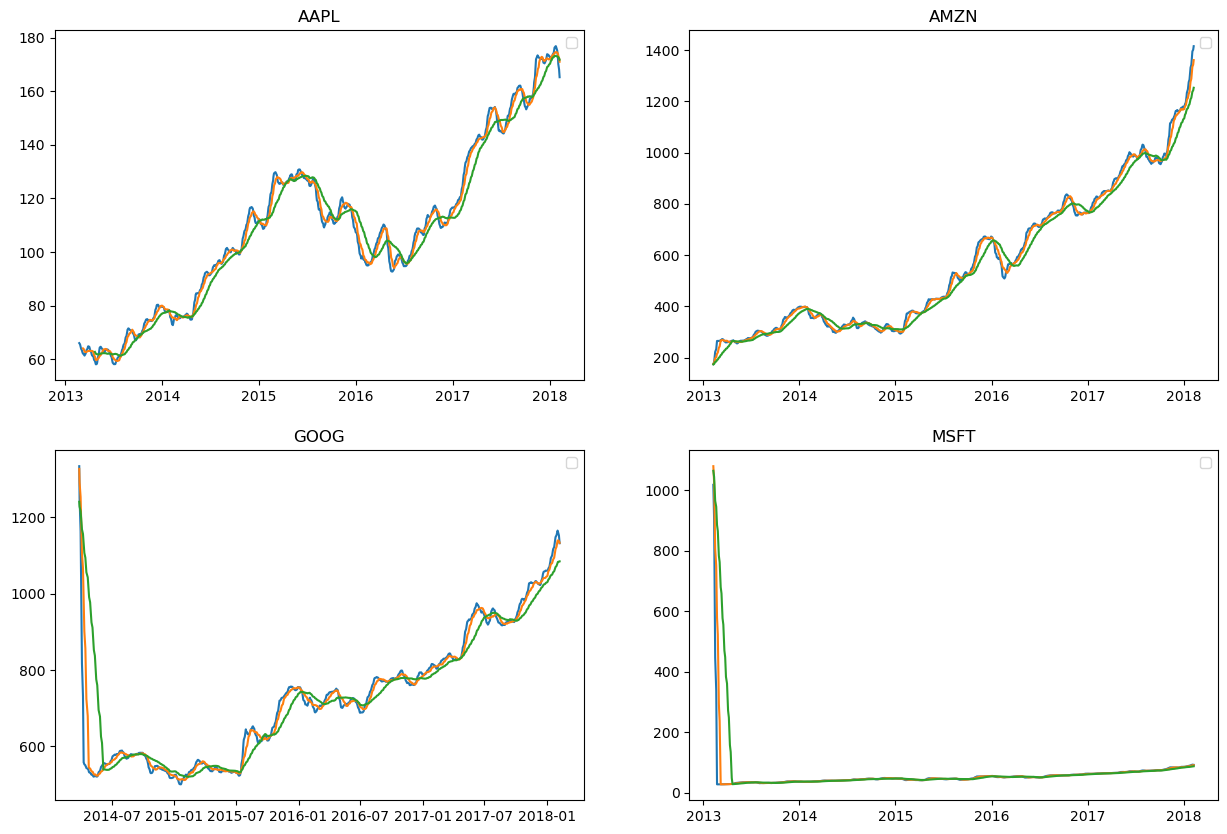

In [300]:
plt.figure(figsize=(15,10))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    plt.plot(df['date'], df['close_10'], df['date'], df['close_20'], df['date'], df['close_50'])
    plt.legend()

    plt.title(company)

## 4.. analyse Closing price change in apple stock !

In [301]:
all_data

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
4747,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT
4748,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT
4749,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT
4750,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT


In [302]:
apple=pd.read_csv(r'C:\\Users\\Sai Sailesh\\Desktop\\individual_stocks_5yr\\AAPL_data.csv')

In [303]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [304]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [305]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [306]:
apple['Daily return(in%)']=apple['close'].pct_change()*100

In [307]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [308]:
import plotly.express as px 

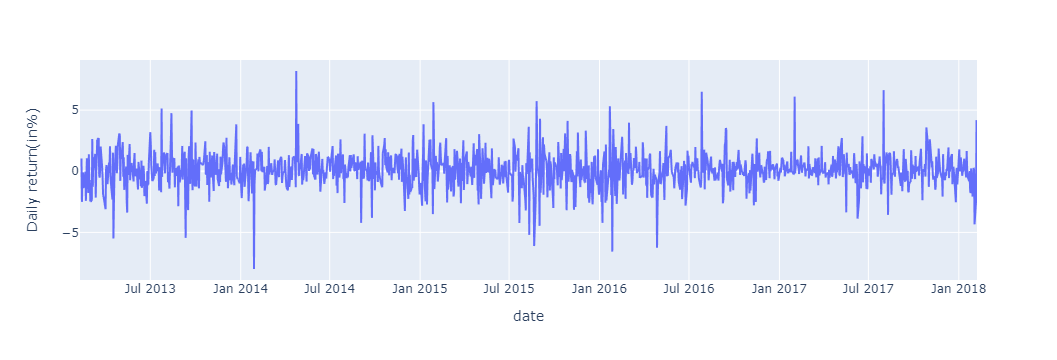

In [309]:
px.line(x='date',y='Daily return(in%)',data_frame=apple)

##  5.. Performing resampling analysis of closing price ..

In [310]:
##a..yearly('Y')  , 
##b..quarterly('Q')   ,
##c..monthly('M') ,
##d..weekly basis ('W'), 
##e..Daily_basis('D')  
#3f..minutes ('3T') , 
##g..30 second bins('30S')   ,
##h..resample('17min')##

In [311]:
apple.dtypes

date                  object
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
Daily return(in%)    float64
dtype: object

In [312]:
apple['date']=pd.to_datetime(apple['date'])

In [313]:
apple.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
Daily return(in%)           float64
dtype: object

In [314]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [315]:
apple.set_index('date',inplace=True)

In [316]:
apple.head()

,open,high,low,close,volume,Name,Daily return(in%)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [317]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

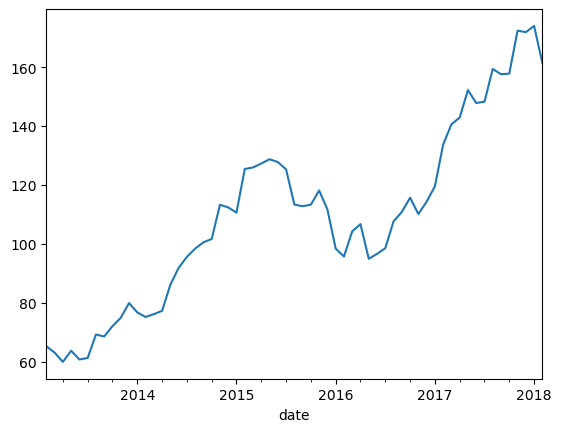

In [318]:
apple['close'].resample('M').mean().plot()

In [319]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

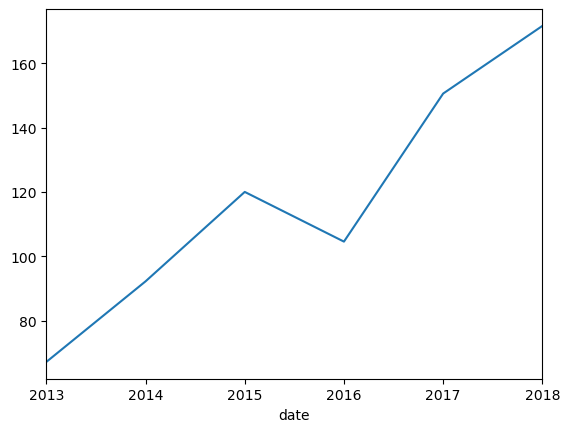

In [320]:
apple['close'].resample('Y').mean().plot()

In [321]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

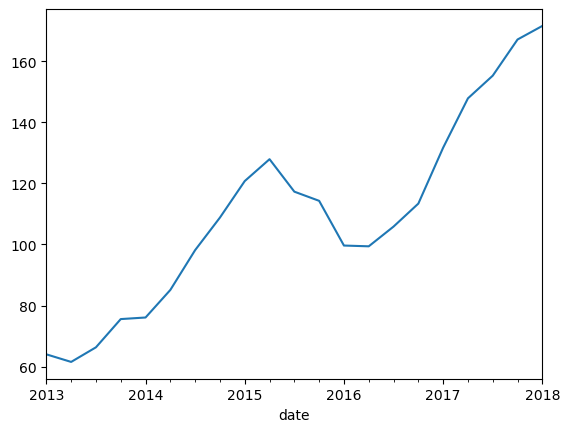

In [322]:
apple['close'].resample('Q').mean().plot()

## 6.. Whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not !

In [323]:
company_list

['C:\\\\Users\\\\Sai Sailesh\\\\Desktop\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Sai Sailesh\\\\Desktop\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Sai Sailesh\\\\Desktop\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\Sai Sailesh\\\\Desktop\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [324]:
app=pd.read_csv(company_list[0])
amzn=pd.read_csv(company_list[1])
google=pd.read_csv(company_list[2])
mfst=pd.read_csv(company_list[3])

In [325]:
closing_price=pd.DataFrame()

In [326]:
closing_price['apple_close']=app['close']
closing_price['amazon_close']=amzn['close']
closing_price['google_close']=google['close']
closing_price['microsoft_close']=mfst['close']

In [327]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [328]:
closing_price.isnull().sum()

apple_close          0
amazon_close         0
google_close       284
microsoft_close      0
dtype: int64

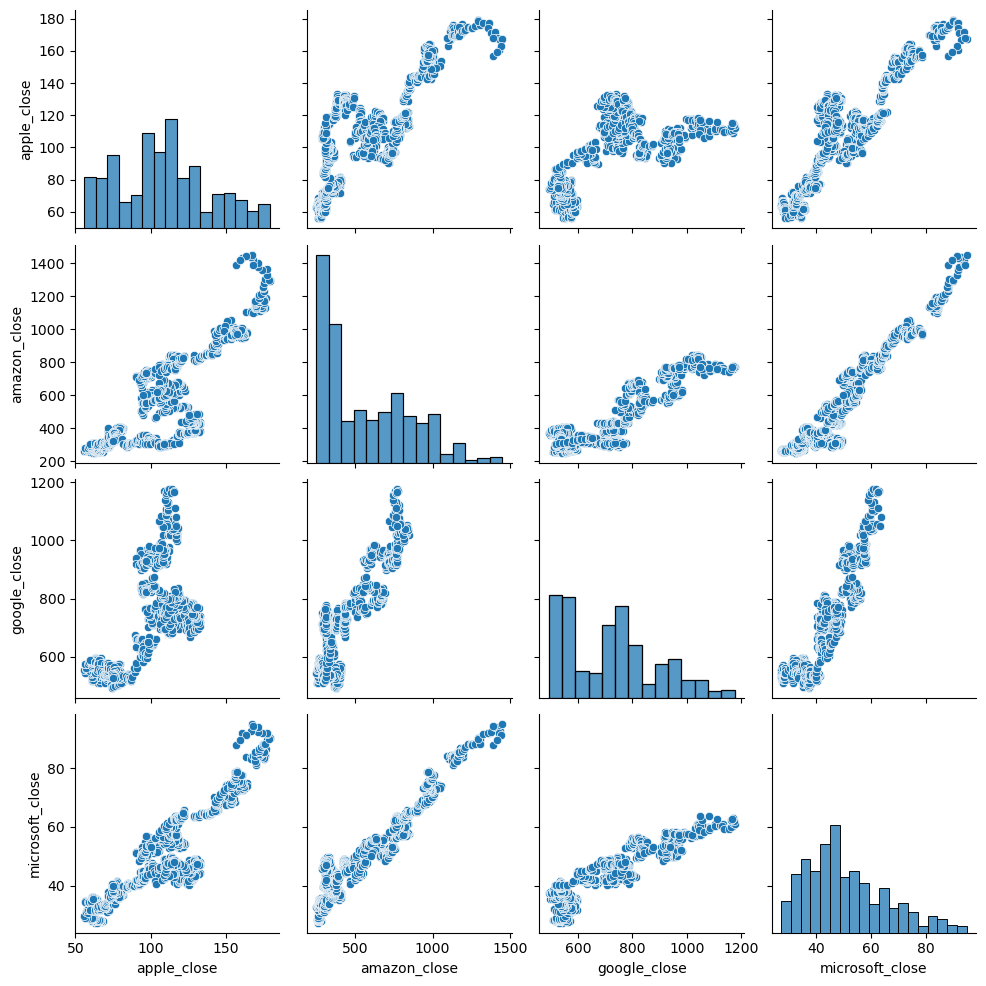

In [329]:
sns.pairplot(closing_price)

In [330]:
closing_price.corr()

,apple_close,amazon_close,google_close,microsoft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amazon_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
microsoft_close,0.899689,0.955977,0.907011,1.000000


<Axes: >

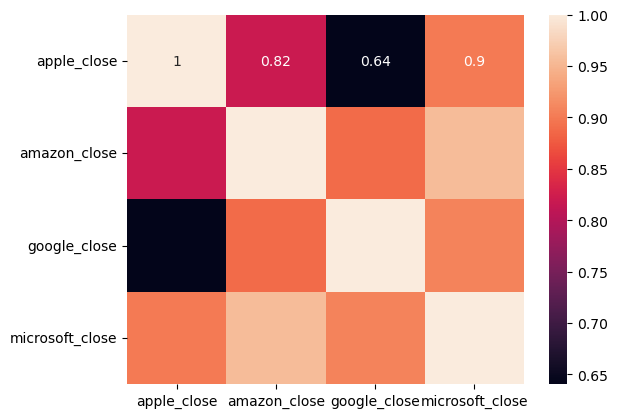

In [331]:
sns.heatmap(closing_price.corr(),annot=True)

## 7.. analyse Whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not !

In [332]:
closing_price 

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [333]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [334]:
(closing_price['apple_close']-closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [335]:
for col in closing_price.columns:
    closing_price[col+'_pct_change']=(closing_price[col]-closing_price[col].shift(1))/closing_price[col].shift(1)*100
    

In [336]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [337]:
closing_price.columns 

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close',
       'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change'],
      dtype='object')

In [339]:
closing_p=closing_price[['apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change']]

In [340]:
closing_p

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


In [341]:
type(closing_p)

pandas.core.frame.DataFrame

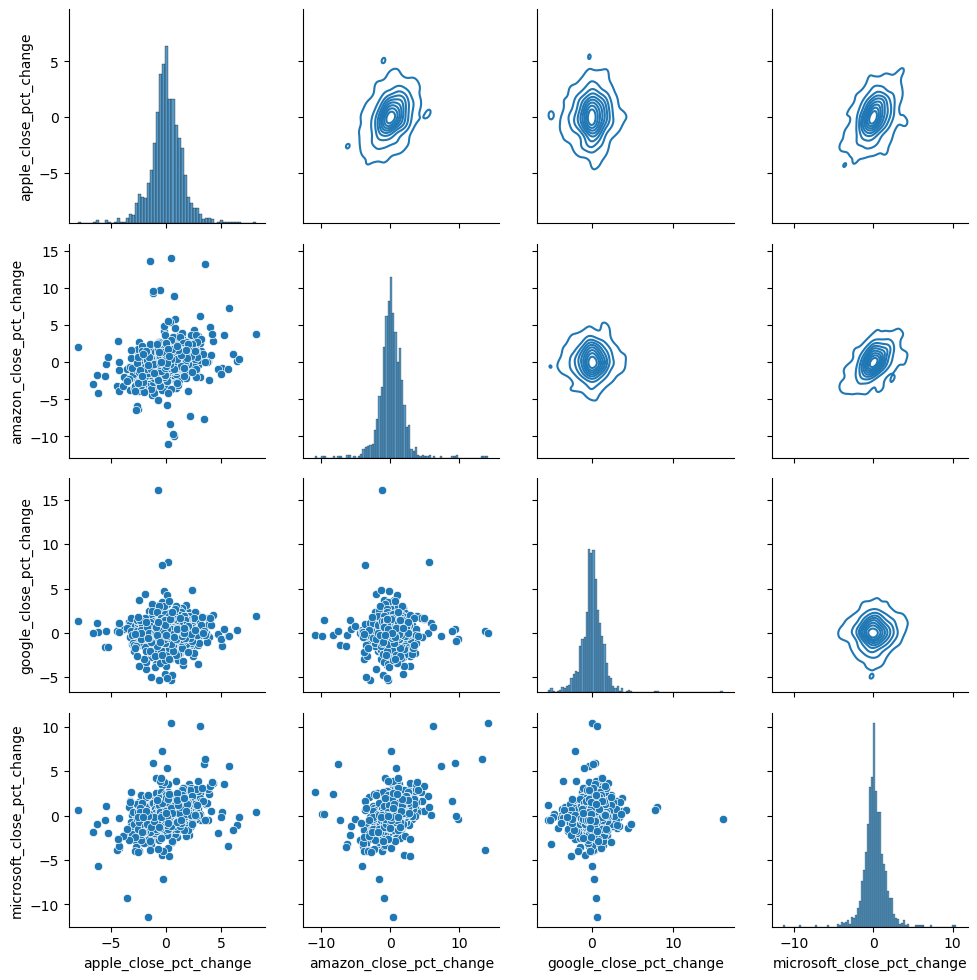

In [348]:
g=sns.PairGrid(closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [349]:
closing_p.corr()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amazon_close_pct_change,0.287659,1.000000,0.027698,0.402678
google_close_pct_change,0.036202,0.027698,1.000000,0.038939
microsoft_close_pct_change,0.366598,0.402678,0.038939,1.000000


<Axes: >

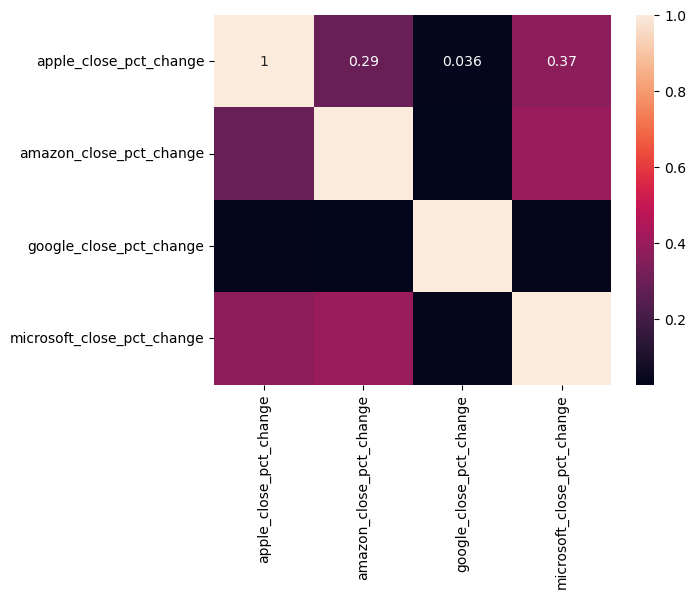

In [351]:
sns.heatmap(closing_p.corr(),annot=True)